# 1. Import Libraries


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


# 2. Data Exploration 

In [31]:
df = pd.read_csv("train.csv")

df.head(2)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.5,0.25,0.75,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.5,0.25,0.50,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201


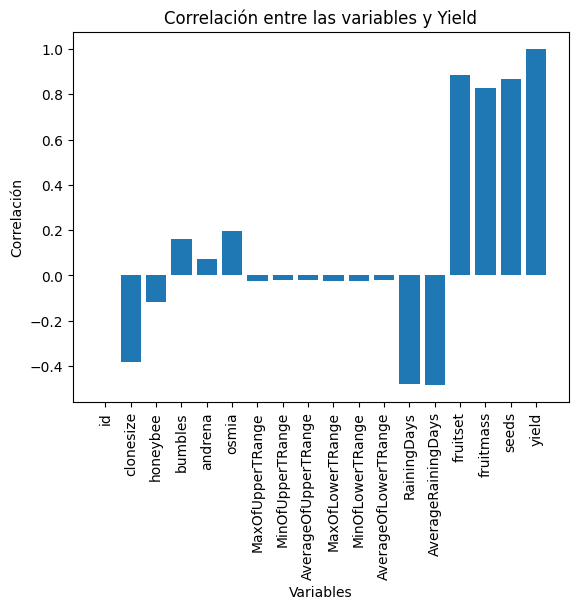

In [64]:
# Vamos a calcular la correlación de Yield con el resto de variables y lo representamos a través de un gráfico. 

correlation = df.corr()['yield']

plt.bar(correlation.index, correlation)
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.title('Correlación entre las variables y Yield')
plt.xticks(rotation=90)

plt.show()



In [34]:
# Vamos a quitar del DF las variables id 

df.head(1)


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.5,0.25,0.75,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146


In [60]:
# Vamos a entrenar el modelo LASSO. 

# Suponiendo que ya tienes tu DataFrame df sin la columna "id"
# y la última columna "yield" es tu variable objetivo (Y)
X = df.drop('yield', axis=1)  # Variables independientes
y = df['yield']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar los datos de las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión Lasso
lasso = Lasso(alpha=1)  # Puedes ajustar el valor de alpha según tus necesidades
lasso.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lasso.predict(X_test_scaled)

# Evaluación del modelo
r2_score = lasso.score(X_test_scaled, y_test)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficiente de determinación R^2:", r2_score)
print("Error Absoluto Medio (MAE):", mae)


Coeficiente de determinación R^2: 0.816718293219971
Error Absoluto Medio (MAE): 370.06766205229076


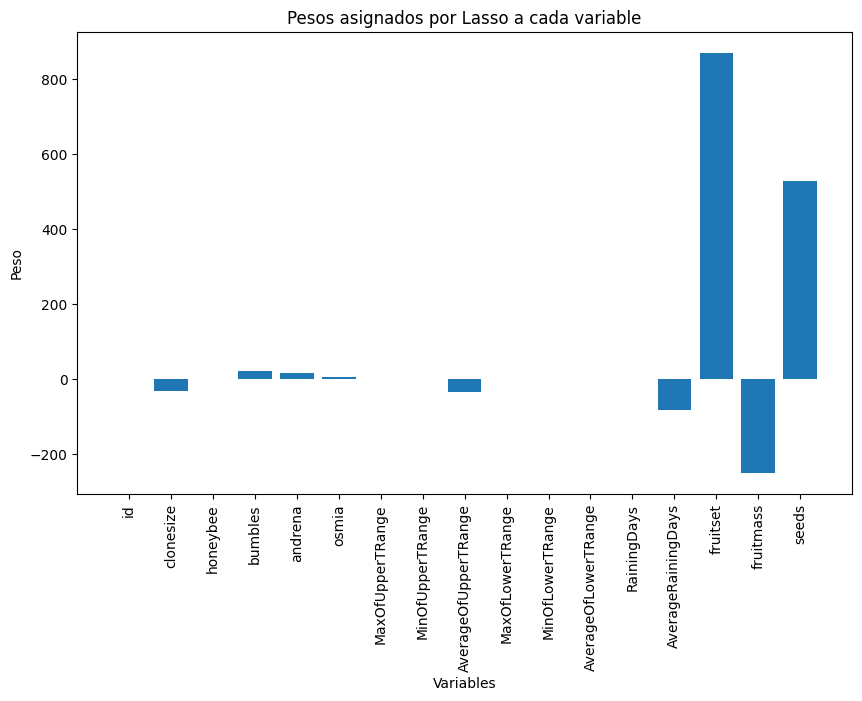

In [58]:

# Obtener los pesos asignados por Lasso
weights = lasso.coef_

# Crear una visualización de los pesos
variables = X.columns.tolist()
plt.figure(figsize=(10, 6))
plt.bar(variables, weights)
plt.xlabel('Variables')
plt.ylabel('Peso')
plt.title('Pesos asignados por Lasso a cada variable')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Ahora vamos a entrenar Ridge


from sklearn.linear_model import Ridge

# Crear y entrenar el modelo de regresión Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según tus necesidades
ridge.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ridge = ridge.predict(X_test_scaled)

# Calcular el MAE y R2
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_score_ridge = ridge.score(X_test_scaled, y_test)

print("Ridge:")
print("Error Absoluto Medio (MAE):", mae_ridge)
print("Coeficiente de determinación R^2:", r2_score_ridge)

Ridge:
Error Absoluto Medio (MAE): 369.88609896730105
Coeficiente de determinación R^2: 0.8170534767855058


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Cargar los archivos train.csv y test.csv en DataFrames
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Separar las variables independientes y la variable objetivo en el conjunto de entrenamiento
X_train = train_df.drop('yield', axis=1)
y_train = train_df['yield']

# Escalar los datos de las variables independientes en el conjunto de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_df)

# Crear y entrenar el modelo de regresión Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según tus necesidades
ridge.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ridge = ridge.predict(X_test_scaled)

# Crear el DataFrame de sumisión
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id']  # Reemplaza 'id' con la columna que contiene los identificadores
submission_df['yield'] = y_pred_ridge

# Guardar la sumisión en un archivo CSV
submission_df.to_csv('submission_5.csv', index=False)


